In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
# name= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
#shape of our dataset
df.shape

(506, 14)

In [4]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#checking for missing data
df.isnull().sum()
#there is no missing value in the data

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<Axes: >

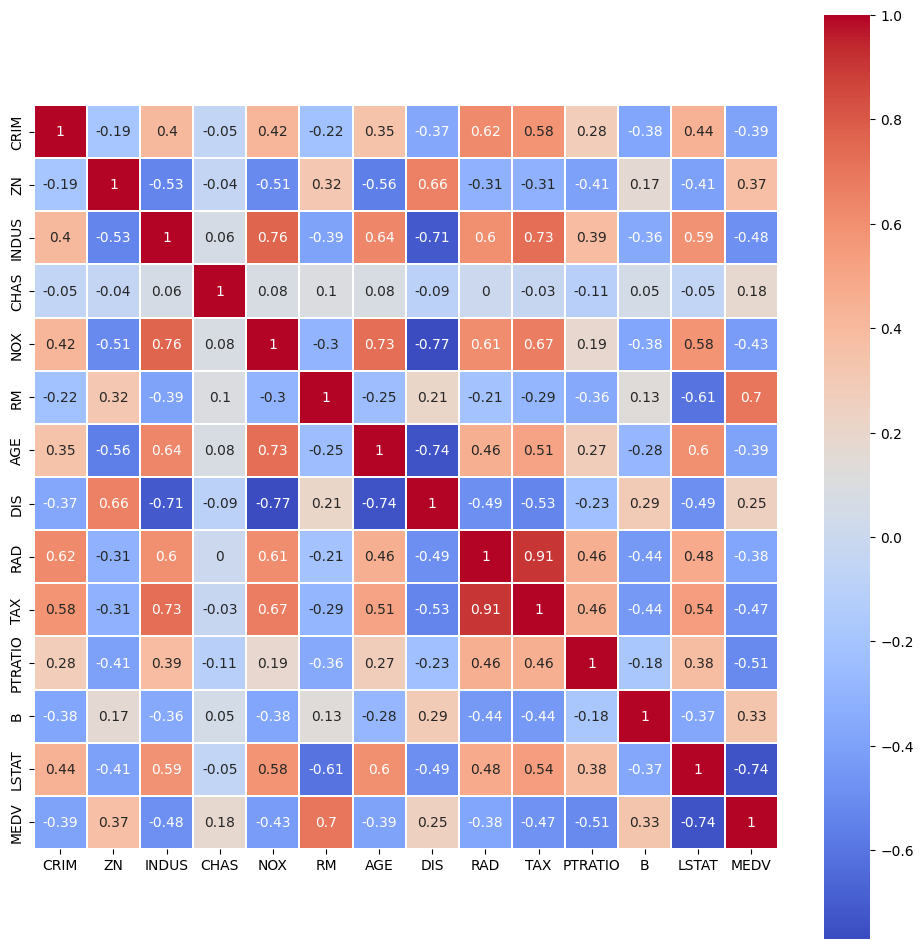

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

In [7]:
#since some of these features shows quite good and very good correlation with our predictive variable Houese Price(MEDV)
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296,15.3,4.98,24.0
1,6.421,242,17.8,9.14,21.6
2,7.185,242,17.8,4.03,34.7
3,6.998,222,18.7,2.94,33.4
4,7.147,222,18.7,NaN,36.2


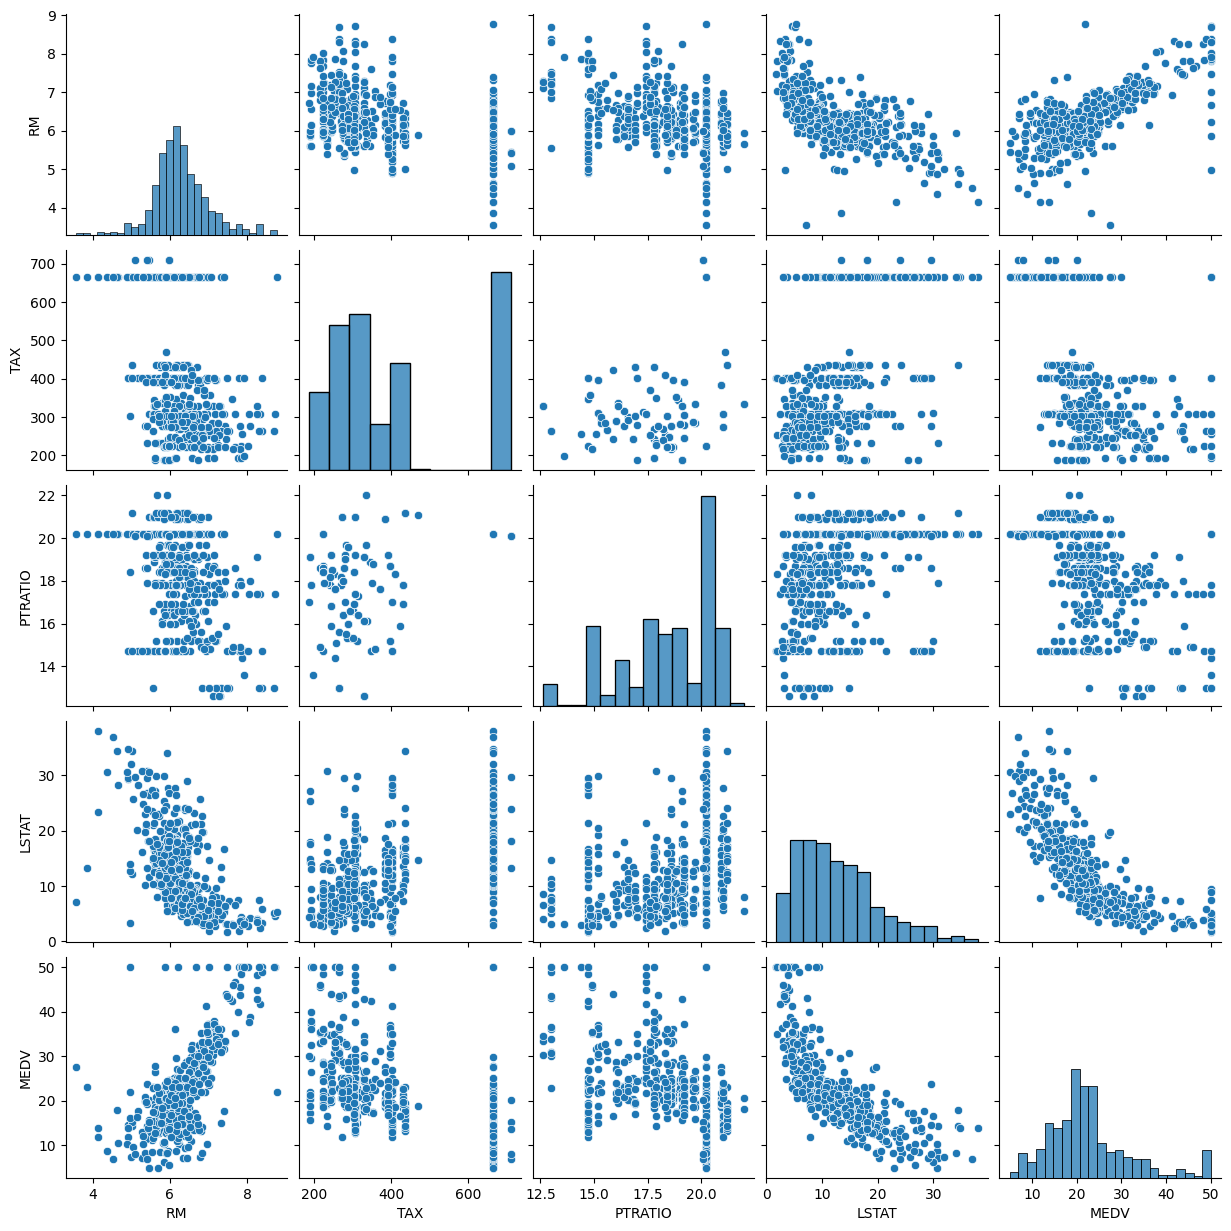

In [8]:
sns.pairplot(data=df1)

In [9]:
#description about data
desc = df1.describe().round(2)
desc

,RM,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,486.00,506.00
mean,6.28,408.24,18.46,12.72,22.53
std,0.70,168.54,2.16,7.16,9.20
min,3.56,187.00,12.60,1.73,5.00
25%,5.89,279.00,17.40,7.12,17.02
50%,6.21,330.00,19.05,11.43,21.20
75%,6.62,666.00,20.20,16.96,25.00
max,8.78,711.00,22.00,37.97,50.00


## 3.1 MEDV

C:\Users\Admin\AppData\Local\Temp\ipykernel_2272\1314071430.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df1.MEDV,color='#500050')


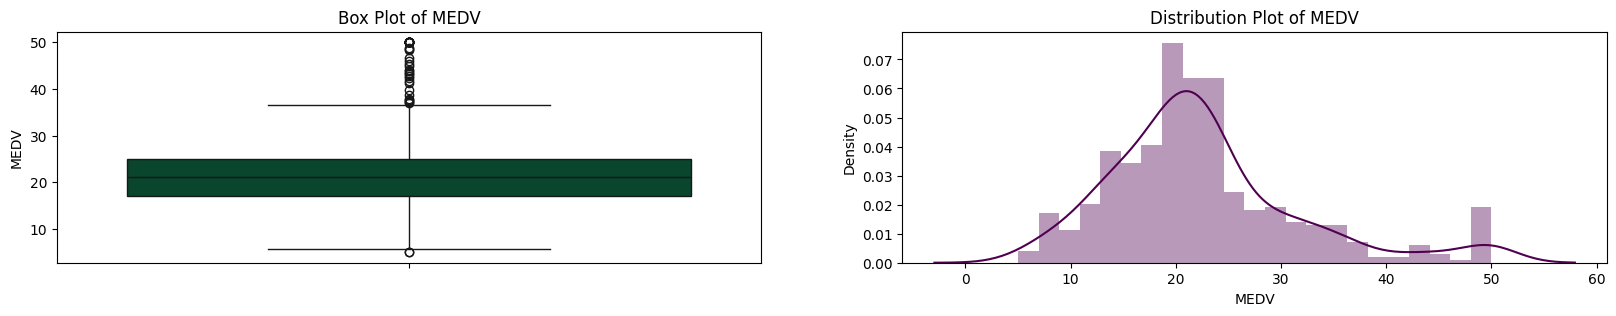

In [10]:
#Box Plot and Distribution Plot for Dependent variable MEDV
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df1.MEDV,color='#005030')
plt.title('Box Plot of MEDV')

plt.subplot(1,2,2)
sns.distplot(a=df1.MEDV,color='#500050')
plt.title('Distribution Plot of MEDV')
plt.show()

In [11]:
MEDV_Q3 = desc['MEDV']['75%']
MEDV_Q1 = desc['MEDV']['25%']
MEDV_IQR = MEDV_Q3 - MEDV_Q1
MEDV_UV = MEDV_Q3 + 1.5*MEDV_IQR
MEDV_LV = MEDV_Q1 - 1.5*MEDV_IQR

df1[df1['MEDV']<MEDV_LV]

,RM,TAX,PTRATIO,LSTAT,MEDV
398,5.453,666,20.2,30.59,5.0
405,5.683,666,20.2,22.98,5.0


In [12]:
df1[df1['MEDV']>MEDV_UV].sort_values(by=['MEDV','RM'])

,RM,TAX,PTRATIO,LSTAT,MEDV
190,6.951,398,15.2,5.10,37.0
179,6.980,193,17.8,5.04,37.2
291,7.148,245,19.2,3.56,37.3
226,8.040,307,17.4,NaN,37.6
182,7.155,193,17.8,4.82,37.9
97,8.069,276,18.0,4.21,38.7
180,7.765,193,17.8,7.56,39.8
157,6.943,403,14.7,4.59,41.3
232,8.337,307,17.4,2.47,41.7
202,7.610,348,14.7,3.11,42.3


In [13]:
print(f'Shape of dataset before remving Outliers: {df1.shape}')
df2 = df1[~(df1['MEDV']==50)]
print(f'Shape of dataset after remving Outliers: {df2.shape}')

Shape of dataset before remving Outliers: (506, 5)
Shape of dataset after remving Outliers: (490, 5)


## 3.2 TAX

C:\Users\Admin\AppData\Local\Temp\ipykernel_2272\1269121807.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df2['TAX'], color='#500050')


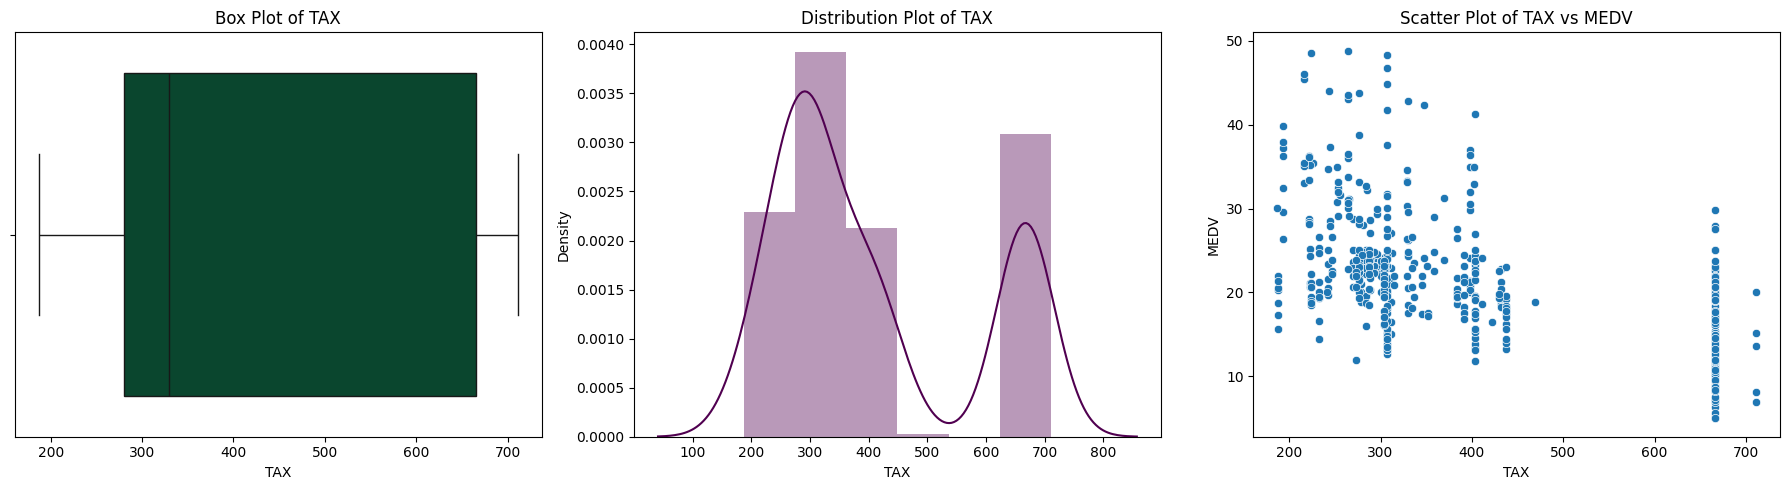

In [14]:

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df2['TAX'], color='#005030')
plt.title('Box Plot of TAX')

plt.subplot(1, 3, 2)
sns.distplot(a=df2['TAX'], color='#500050')
plt.title('Distribution Plot of TAX')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df2['TAX'], y=df2['MEDV'])
plt.title('Scatter Plot of TAX vs MEDV')

plt.tight_layout()
plt.show()


In [15]:
temp_df = df2[df1['TAX']>600].sort_values(by=['RM','MEDV'])
temp_df.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_2272\180268854.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = df2[df1['TAX']>600].sort_values(by=['RM','MEDV'])


(132, 5)

In [16]:
temp_df

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,666,20.2,7.12,27.5
367,3.863,666,20.2,13.33,23.1
406,4.138,666,20.2,23.34,11.9
374,4.138,666,20.2,37.97,13.8
384,4.368,666,20.2,30.63,8.8
...,...,...,...,...,...
473,6.980,666,20.2,NaN,29.8
482,7.061,666,20.2,7.01,25.0
375,7.313,666,20.2,13.44,15.0
453,7.393,666,20.2,16.74,17.8


In [17]:
temp_df.describe()

,RM,TAX,PTRATIO,LSTAT,MEDV
count,132.000000,132.000000,132.000000,126.000000,132.000000
mean,6.000689,667.704545,20.196212,19.181190,14.994697
std,0.712621,8.623365,0.019163,6.539503,5.405825
min,3.561000,666.000000,20.100000,5.290000,5.000000
25%,5.674250,666.000000,20.200000,14.662500,10.900000
50%,6.139500,666.000000,20.200000,18.065000,14.100000
75%,6.407250,666.000000,20.200000,23.285000,19.200000
max,8.780000,711.000000,20.200000,37.970000,29.800000


In [18]:
TAX_10 = df2[(df2['TAX']<600) & (df2['LSTAT']>=0) & (df2['LSTAT']<10)]['TAX'].mean()
TAX_20 = df2[(df2['TAX']<600) & (df2['LSTAT']>=10) & (df2['LSTAT']<20)]['TAX'].mean()
TAX_30 = df2[(df2['TAX']<600) & (df2['LSTAT']>=20) & (df2['LSTAT']<30)]['TAX'].mean()
TAX_40 = df2[(df2['TAX']<600) & (df2['LSTAT']>=30)]['TAX'].mean()

indexes = list(df2.index)
for i in indexes:
    if df2['TAX'][i] > 600:
        if (0 <= df2['LSTAT'][i] < 10):
            df2.at[i,'TAX'] = TAX_10
        elif (10 <= df2['LSTAT'][i] < 20):
            df2.at[i,'TAX'] = TAX_20
        elif (20 <= df2['LSTAT'][i] < 30):
            df2.at[i,'TAX'] = TAX_30
        elif (df2['LSTAT'][i] >30):
            df2.at[i,'TAX'] = TAX_40

print('Values imputed successfully')

Values imputed successfully


C:\Users\Admin\AppData\Local\Temp\ipykernel_2272\507625484.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '334.02985074626866' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.at[i,'TAX'] = TAX_20


In [19]:
#This show all those extreme TAX values are replaced successfully
df2[df2['TAX']>600]['TAX'].count()

6

C:\Users\Admin\AppData\Local\Temp\ipykernel_2272\716017547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df2.TAX,color='#500050')


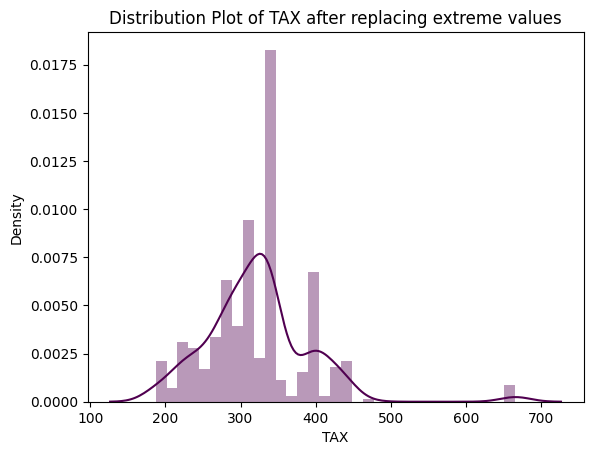

In [20]:
sns.distplot(a=df2.TAX,color='#500050')
plt.title('Distribution Plot of TAX after replacing extreme values')
plt.show()

## 3.3 PTRATIO

C:\Users\Admin\AppData\Local\Temp\ipykernel_2272\209775783.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df2.PTRATIO,color='#500050')


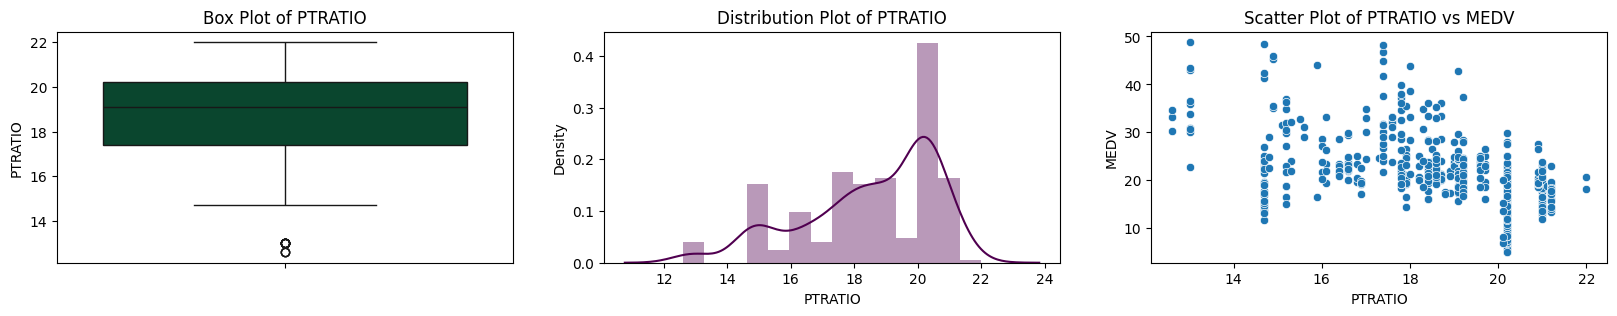

In [21]:
#Box Plot, Distribution Plot and Scatter Plot for PTRATIO
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.PTRATIO,color='#005030')
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.distplot(a=df2.PTRATIO,color='#500050')
plt.title('Distribution Plot of PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(x=df2['PTRATIO'],y=df2['MEDV'])
plt.title('Scatter Plot of PTRATIO vs MEDV')
plt.show()

In [22]:
df2[df2['PTRATIO']<14].sort_values(by=['LSTAT','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
268,7.470,264.0,13.0,3.16,43.5
196,7.287,329.0,12.6,4.08,33.3
262,8.398,264.0,13.0,5.91,48.8
198,7.274,329.0,12.6,6.62,34.6
259,6.842,264.0,13.0,6.90,30.1
261,7.520,264.0,13.0,7.26,43.1
258,7.333,264.0,13.0,7.79,36.0
264,7.206,264.0,13.0,8.10,36.5
197,7.107,329.0,12.6,8.61,30.3
260,7.203,264.0,13.0,9.59,33.8


## 3.4 LSTAT

C:\Users\Admin\AppData\Local\Temp\ipykernel_2272\3206565945.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df2.LSTAT,color='#500050')


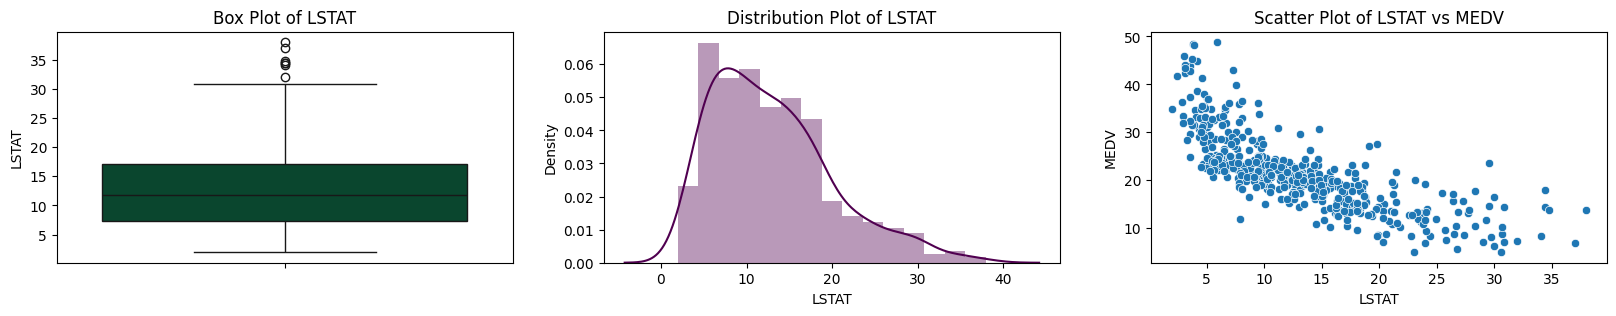

In [23]:
#Box Plot, Distribution Plot and Scatter Plot for LSTAT
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.LSTAT,color='#005030')
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.distplot(a=df2.LSTAT,color='#500050')
plt.title('Distribution Plot of LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(x=df2['LSTAT'],y=df2['MEDV'])
plt.title('Scatter Plot of LSTAT vs MEDV')

plt.show()

In [24]:
LSTAT_Q3 = desc['LSTAT']['75%']
LSTAT_Q1 = desc['LSTAT']['25%']
LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1
LSTAT_UV = LSTAT_Q3 + 1.5*LSTAT_IQR
LSTAT_LV = LSTAT_Q1 - 1.5*LSTAT_IQR

df2[df2['LSTAT']>LSTAT_UV].sort_values(by='LSTAT')

,RM,TAX,PTRATIO,LSTAT,MEDV
387,5.000,335.0,20.2,31.99,7.4
438,5.935,335.0,20.2,34.02,8.4
412,4.628,335.0,20.2,34.37,17.9
141,5.019,437.0,21.2,34.41,14.4
373,4.906,335.0,20.2,34.77,13.8
414,4.519,335.0,20.2,36.98,7.0
374,4.138,335.0,20.2,37.97,13.8


## 3.5 RM

C:\Users\Admin\AppData\Local\Temp\ipykernel_2272\1164545058.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df2.RM,color='#500050')


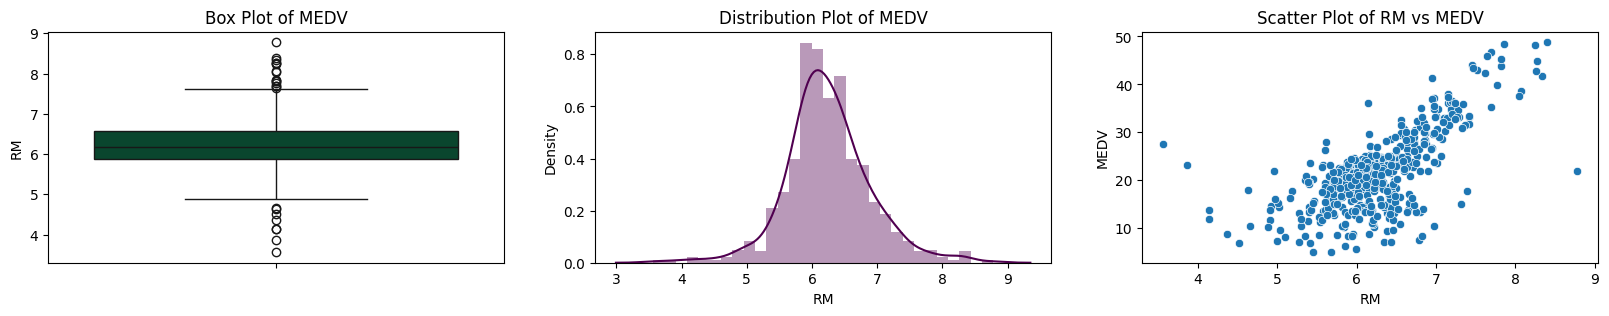

In [25]:
#Box Plot, Distribution Plot and Scatter Plot for RM
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.RM,color='#005030')
plt.title('Box Plot of MEDV')

plt.subplot(1,3,2)
sns.distplot(a=df2.RM,color='#500050')
plt.title('Distribution Plot of MEDV')

plt.subplot(1,3,3)
sns.scatterplot(x=df2['RM'],y=df2['MEDV'])
plt.title('Scatter Plot of RM vs MEDV')

plt.show()

In [26]:
RM_Q3 = desc['RM']['75%']
RM_Q1 = desc['RM']['25%']
RM_IQR = RM_Q3 - RM_Q1
RM_UV = RM_Q3 + 1.5*RM_IQR
RM_LV = RM_Q1 - 1.5*RM_IQR

df2[df2['RM']<RM_LV].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
365,3.561,294.139785,20.2,7.12,27.5
367,3.863,334.029851,20.2,13.33,23.1
406,4.138,338.636364,20.2,23.34,11.9
374,4.138,335.000000,20.2,37.97,13.8
384,4.368,335.000000,20.2,30.63,8.8
414,4.519,335.000000,20.2,36.98,7.0
412,4.628,335.000000,20.2,34.37,17.9
386,4.652,338.636364,20.2,28.28,10.5


In [27]:
print(f'Shape of dataset before removing data points: {df2.shape}')
df3 = df2.drop(axis=0,index=[365,367])
print(f'Shape of dataset before removing data points: {df3.shape}')

Shape of dataset before removing data points: (490, 5)
Shape of dataset before removing data points: (488, 5)


In [28]:
df3[df3['RM']>RM_UV].sort_values(by=['RM','MEDV'])

,RM,TAX,PTRATIO,LSTAT,MEDV
180,7.765,193.000000,17.8,7.56,39.8
98,7.820,276.000000,18.0,3.57,43.8
280,7.820,216.000000,14.9,3.76,45.4
203,7.853,224.000000,14.7,3.81,48.5
226,8.040,307.000000,17.4,NaN,37.6
97,8.069,276.000000,18.0,4.21,38.7
233,8.247,307.000000,17.4,3.95,48.3
253,8.259,330.000000,19.1,3.54,42.8
224,8.266,307.000000,17.4,4.14,44.8
232,8.337,307.000000,17.4,2.47,41.7


In [29]:
print(f'Shape of dataset before removing data points: {df3.shape}')
df3 = df3.drop(axis=0,index=[364])
print(f'Shape of dataset before removing data points: {df3.shape}')

Shape of dataset before removing data points: (488, 5)
Shape of dataset before removing data points: (487, 5)


## 4. Splitting Dataset into Train and Test Set

In [30]:
#Now will split our dataset into Dependent variable and Independent variable

X = df3.iloc[:,0:4].values
y = df3.iloc[:,-1:].values

In [31]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (487, 4)
Shape of Independent Variable y = (487, 1)


In [32]:
def FeatureScaling(X):
    """
    is function takes an array as an input, which needs to be scaled down.
    Apply Standardization technique to it and scale down the features with mean = 0 and standard deviation = 1

    Input <- 2 dimensional numpy array
    Returns -> Numpy array after applying Feature Scaling
    """
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i]-mean[i])/std[i]

    return X

In [33]:
X = FeatureScaling(X)

In [34]:
m,n = X.shape
X = np.append(arr=np.ones((m,1)),values=X,axis=1)

In [35]:
#Now we will spit our data into Train set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (389, 5)
Shape of X_test = (98, 5)
Shape of y_train = (389, 1)
Shape of y_test = (98, 1)


## 5.1 Model Prepration

In [36]:
#ComputeCost function determines the cost (sum of squared errors)

def ComputeCost(X,y,theta):
    """
    This function takes three inputs and uses the Cost Function to determine the cost (basically error of prediction vs
    actual values)
    Cost Function: Sum of square of error in predicted values divided by number of data points in the set
    J = 1/(2*m) *  Summation(Square(Predicted values - Actual values))

    Input <- Take three numoy array X,y and theta
    Return -> The cost calculated from the Cost Function
    """
    m=X.shape[0] #number of data points in the set
    J = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
    return J

In [37]:
#Gradient Descent Algorithm to minimize the Cost and find best parameters in order to get best line for our dataset

def GradientDescent(X,y,theta,alpha,no_of_iters):
    """
    Gradient Descent Algorithm to minimize the Cost

    Input <- X, y and theta are numpy arrays
            X -> Independent Variables/ Features
            y -> Dependent/ Target Variable
            theta -> Parameters
            alpha -> Learning Rate i.e. size of each steps we take
            no_of_iters -> Number of iterations we want to perform

    Return -> theta (numpy array) which are the best parameters for our dataset to fit a linear line
             and Cost Computed (numpy array) for each iteration
    """
    m=X.shape[0]
    J_Cost = []
    for i in range(no_of_iters):
        error = np.dot(X.transpose(),(X.dot(theta)-y))
        theta = theta - alpha * (1/m) * error
        J_Cost.append(ComputeCost(X,y,theta))

    return theta, np.array(J_Cost)

In [38]:
iters = 1000

alpha1 = 0.001
theta1 = np.zeros((X_train.shape[1],1))
theta1, J_Costs1 = GradientDescent(X_train,y_train,theta1,alpha1,iters)

alpha2 = 0.003
theta2 = np.zeros((X_train.shape[1],1))
theta2, J_Costs2 = GradientDescent(X_train,y_train,theta2,alpha2,iters)

alpha3 = 0.01
theta3 = np.zeros((X_train.shape[1],1))
theta3, J_Costs3 = GradientDescent(X_train,y_train,theta3,alpha3,iters)

alpha4 = 0.03
theta4 = np.zeros((X_train.shape[1],1))
theta4, J_Costs4 = GradientDescent(X_train,y_train,theta4,alpha4,iters)

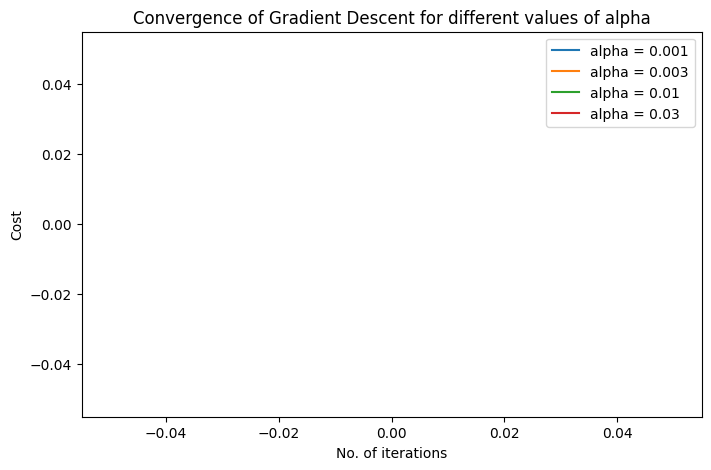

In [39]:
plt.figure(figsize=(8,5))
plt.plot(J_Costs1,label = 'alpha = 0.001')
plt.plot(J_Costs2,label = 'alpha = 0.003')
plt.plot(J_Costs3,label = 'alpha = 0.01')
plt.plot(J_Costs4,label = 'alpha = 0.03')
plt.title('Convergence of Gradient Descent for different values of alpha')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [40]:
theta4

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [41]:
def Predict(X,theta):
    """
    This function predicts the result for the unseen data
    """
    y_pred = X.dot(theta)
    return y_pred

In [42]:
y_pred = Predict(X_test,theta4)
y_pred[:5]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]])

## 5.2 Model Evaluation

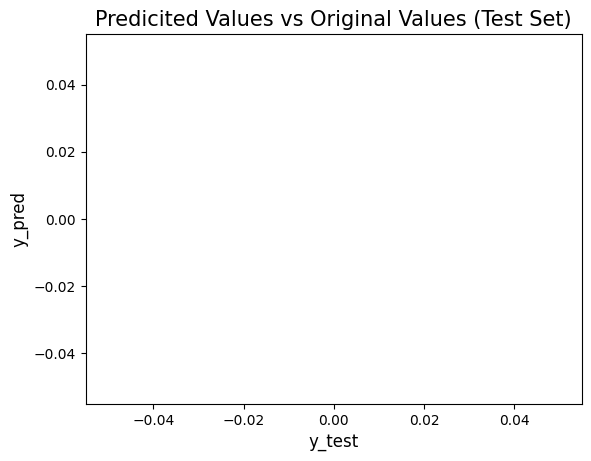

In [43]:
plt.scatter(x=y_test,y=y_pred,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

In [44]:
sns.residplot(y_pred,(y_pred-y_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

TypeError: residplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
sns.distplot(y_pred-y_test)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

In [ ]:
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

In [ ]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}',f'Mean Absolute Error: {mae}',f'Root Mean Squared Error: {rmse}',sep='\n')

## 5.3 Model Interpretation

In [ ]:
#coefficients of regression model
coeff=np.array([y for x in theta4 for y in x]).round(2)
features=['Bias','RM','TAX','PTRATIO','LSTAT']
eqn = 'MEDV = '
for f,c in zip(features,coeff):
    eqn+=f" + ({c} * {f})";

print(eqn)

In [ ]:
sns.barplot(x=features,y=coeff)
plt.ylim([-5,25])
plt.xlabel('Coefficient Names',size=12)
plt.ylabel('Coefficient Values',size=12)
plt.title('Visualising Regression Coefficients',size=15)
plt.show()